In [5]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
import seaborn as sns
import cv2
import os
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, GlobalAveragePooling2D, Dropout, Flatten,Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam

About Dataset:

Context: 

This dataset belongs to DPhi Data Sprint #25: Flower Recognition. The dataset contains raw jpeg images of five types of flowers.

daisy
dandelion
rose
sunflower
tulip

Content
train - contains all the images that are to be used for training your model.  In this folder you will find five folders namely - 'daisy', 'dandelion', 'rose', 'sunflower' and 'tulip' which contain the images of the respective flowers

test - contains 924 flowers images. For these images you are required to make predictions as the respective flower names - 'daisy', 'dandelion', 'rose', 'sunflower' and 'tulip'

Testing_set_flower.csv - this is the order of the predictions for each image that is to be submitted on the platform. Make sure the predictions you download are with their image's filename in the same order as given in this file.

sample_submission: This is a csv file that contains the sample submission for the data sprint.

Basis Flow of Work:

 **1. EDA**
      
 **2. Pre-processing**
    
 **3. Modeling**
    
 **4. Prediction**

In [6]:
train_path = "/kaggle/input/flowers-dataset/train"
test_path = "/kaggle/input/flowers-dataset/test"
submission = pd.read_csv("/kaggle/input/flowers-dataset/sample_submission.csv")
class_names = os.listdir(train_path)
class_names

['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

In [7]:
for i in class_names:
    print("Number of", i.capitalize(), "images:", len(os.listdir(train_path + "/" + i)))

Number of Dandelion images: 646
Number of Daisy images: 501
Number of Sunflower images: 495
Number of Tulip images: 607
Number of Rose images: 497


In [8]:
X = []
y = []

for i, class_name in enumerate(class_names): 
    class_path = os.path.join(train_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = imread(image_path) 

        image = cv2.resize(image, (224, 224))
        X.append(image)
        y.append(i)
X = np.array(X)
y = np.array(y)

total test size : 924


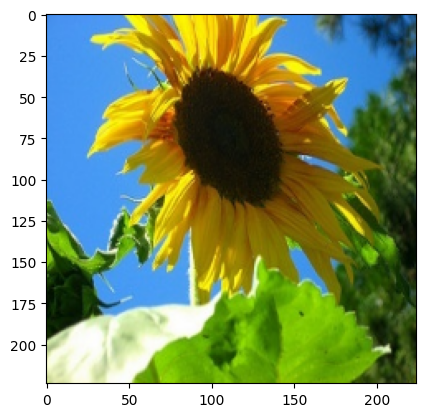

In [9]:
test = []

image_names = os.listdir(test_path)
image_names.sort(key = lambda x: int(re.search(r'Image_(\d+)', x).group(1)))  

for image_name in image_names:
    
    image_path = os.path.join(test_path, image_name)  
    image = imread(image_path)
    image = cv2.resize(image, (224, 224))
    test.append(image)

print("total test size :", len(os.listdir(test_path)))    
plt.imshow(test[0]);

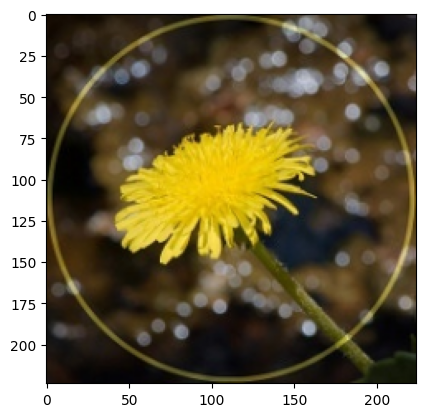

In [10]:
plt.imshow(test[922] )

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [12]:
from tensorflow.keras.layers import InputLayer, Lambda
from tensorflow.keras.applications import ResNet50

In [13]:
optimizer = Adam(learning_rate = 0.001)
base_model = ResNet50(include_top = False, weights = "imagenet", input_shape = (224, 224, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Lambda, GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50

# Create a Sequential model
model = Sequential()

# Add an InputLayer with the input shape
model.add(InputLayer(input_shape=(224, 224, 3)))



# Load the pre-trained ResNet-50 model as the base model
base_model = ResNet50(include_top=False,
                      weights='imagenet',
                      input_shape=(224, 224, 3)
                     )
for layer in base_model.layers:
        layer.trainable=False  # default true
        
# Add the pre-trained model to your custom model
model.add(base_model)

# Add a GlobalAveragePooling2D layer
model.add(GlobalAveragePooling2D())

# Add a Dense layer for classification with 5 classes and softmax activation
model.add(Dense(5, activation='softmax'))

# Define your optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # You can adjust the learning rate as needed

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 23,597,957
Trainable params: 10,245
Non-trainable params: 23,587,712
_________________________________________________________________


In [15]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 15)
model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/50
69/69 [==============================] - 13s 97ms/step - loss: 0.8137 - accuracy: 0.6963 - val_loss: 0.4667 - val_accuracy: 0.8291
Epoch 2/50
69/69 [==============================] - 5s 67ms/step - loss: 0.3629 - accuracy: 0.8711 - val_loss: 0.4342 - val_accuracy: 0.8564
Epoch 3/50
69/69 [==============================] - 5s 67ms/step - loss: 0.2629 - accuracy: 0.9139 - val_loss: 0.3736 - val_accuracy: 0.8782
Epoch 4/50
69/69 [==============================] - 5s 67ms/step - loss: 0.2147 - accuracy: 0.9349 - val_loss: 0.3648 - val_accuracy: 0.8764
Epoch 5/50
69/69 [==============================] - 5s 67ms/step - loss: 0.1744 - accuracy: 0.9454 - val_loss: 0.3570 - val_accuracy: 0.8836
Epoch 6/50
69/69 [==============================] - 5s 67ms/step - loss: 0.1460 - accuracy: 0.9572 - val_loss: 0.3409 - val_accuracy: 0.8873
Epoch 7/50
69/69 [==============================] - 5s 67ms/step - loss: 0.1244 - accuracy: 0.9718 - val_loss: 0.3491 - val_accuracy: 0.8855
Epoch 8/50
6

In [16]:
pred = model.predict(X_test)
predict_digits = np.argmax(pred, axis = 1)

18/18 [==============================] - 2s 49ms/step


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print("----------------TRAİN------------------------------------------")
y_train_pred=model.predict(X_train)
probs = np.array(y_train_pred)
y_train_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_train, y_train_pred)) 
print(classification_report(y_train, y_train_pred))

print("----------------TEST------------------------------------------")

# Eval Metrics fot Test; 

y_pred=model.predict(X_test)
probs = np.array(y_pred)
y_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

----------------TRAİN------------------------------------------
69/69 [==============================] - 3s 49ms/step
[[517   0   0   0   0]
 [  0 401   0   0   0]
 [  0   0 396   0   0]
 [  0   0   0 484   1]
 [  0   0   0   0 397]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       517
           1       1.00      1.00      1.00       401
           2       1.00      1.00      1.00       396
           3       1.00      1.00      1.00       485
           4       1.00      1.00      1.00       397

    accuracy                           1.00      2196
   macro avg       1.00      1.00      1.00      2196
weighted avg       1.00      1.00      1.00      2196

----------------TEST------------------------------------------
18/18 [==============================] - 1s 50ms/step
[[117   8   2   2   0]
 [  5  91   0   4   0]
 [  1   4  87   4   3]
 [  1   1   3 107  10]
 [  0   0   1   7  92]]
              precision    recall  f1-score 

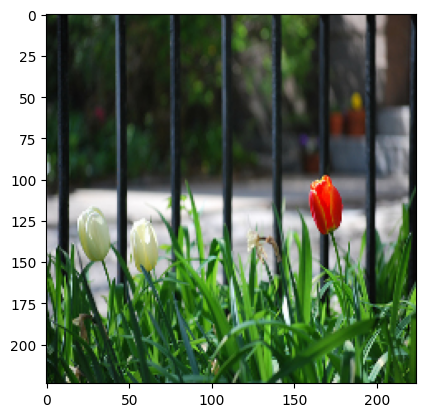

In [18]:
plt.imshow(X_test[121])

In [19]:
model.save("cnn2-resnet50.h5")

In [20]:

model = tf.keras.models.load_model("cnn2-resnet50.h5")


prediction = model.predict(np.array(test))



29/29 [==============================] - 3s 72ms/step


In [21]:
prediction

array([[9.4135885e-06, 1.4851810e-04, 9.9984205e-01, 2.8735325e-08,
        2.7674565e-09],
       [1.1510157e-07, 3.1554455e-07, 9.9999952e-01, 1.8858579e-09,
        4.6212496e-09],
       [9.9737406e-01, 2.6142215e-03, 9.6816739e-06, 1.8916635e-06,
        2.7228873e-07],
       ...,
       [9.9994791e-01, 8.8006527e-06, 1.7310094e-05, 2.1746269e-05,
        4.1876610e-06],
       [9.9877936e-01, 7.1314728e-04, 5.0727295e-04, 2.6341680e-09,
        9.3267474e-08],
       [5.5578675e-02, 9.3514919e-01, 9.4729403e-06, 9.2448089e-03,
        1.7800343e-05]], dtype=float32)

In [22]:
class_labels = ['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']


predicted_classes = [class_labels[np.argmax(prediction[i])] for i in range(len(prediction))]



In [23]:
predicted_classes[89]

'tulip'

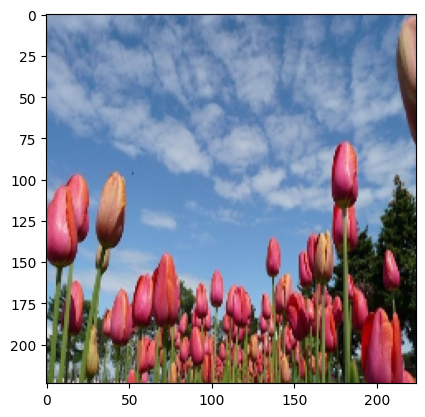

In [24]:
plt.imshow(test[89])

In [25]:
submission["prediction"] = predicted_classes

In [26]:
submission

,prediction
0,sunflower
1,sunflower
2,dandelion
3,rose
4,rose
...,...
919,daisy
920,sunflower
921,dandelion
922,dandelion


In [27]:
submission.iloc[89]

prediction    tulip
Name: 89, dtype: object

In [29]:
submission.to_csv("resnet50.csv",index = False)